# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_heart=pd.read_csv('heartdisease_data.csv')
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


IMPUTER

In [3]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df_heart.values)
df=imp.transform(df_heart)
df_heart=pd.DataFrame(df)
df_heart

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,0.0,7.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,0.0,7.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,0.0,7.0,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,0.0,7.0,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,2.0,0.0,7.0,1.0
196,62.0,1.0,1.0,120.0,139.0,0.0,1.0,120.0,1.0,0.0,2.0,0.0,7.0,0.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,0.0,6.0,2.0
198,58.0,1.0,4.0,120.0,385.0,1.0,2.0,120.0,1.0,0.0,2.0,0.0,7.0,0.0


In [4]:
num = df_heart._get_numeric_data()
num[num < 0] = 0
df_heart

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,0.0,7.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,0.0,7.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,0.0,7.0,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,0.0,7.0,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,2.0,0.0,7.0,1.0
196,62.0,1.0,1.0,120.0,139.0,0.0,1.0,120.0,1.0,0.0,2.0,0.0,7.0,0.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,0.0,6.0,2.0
198,58.0,1.0,4.0,120.0,385.0,1.0,2.0,120.0,1.0,0.0,2.0,0.0,7.0,0.0


# EXPLORATORY DATA ANALYSIS

In [5]:
df_heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,0.0,7.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,0.0,7.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,0.0,7.0,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,0.0,7.0,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,0.0,7.0,0.0


In [6]:
df_heart.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
195,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,2.0,0.0,7.0,1.0
196,62.0,1.0,1.0,120.0,139.0,0.0,1.0,120.0,1.0,0.0,2.0,0.0,7.0,0.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,0.0,6.0,2.0
198,58.0,1.0,4.0,120.0,385.0,1.0,2.0,120.0,1.0,0.0,2.0,0.0,7.0,0.0
199,62.0,1.0,2.0,120.0,254.0,0.0,2.0,93.0,1.0,0.0,2.0,0.0,7.0,1.0


In [7]:
df_heart.shape

(200, 14)

In [8]:
df_heart.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object

In [9]:
df_heart.columns

RangeIndex(start=0, stop=14, step=1)

In [10]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
0     200 non-null float64
1     200 non-null float64
2     200 non-null float64
3     200 non-null float64
4     200 non-null float64
5     200 non-null float64
6     200 non-null float64
7     200 non-null float64
8     200 non-null float64
9     200 non-null float64
10    200 non-null float64
11    200 non-null float64
12    200 non-null float64
13    200 non-null float64
dtypes: float64(14)
memory usage: 22.0 KB


In [11]:
df_heart.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,129.910000,172.490000,0.340000,0.735000,122.055000,0.740000,0.95350,2.065000,0.0,6.880000,1.520000
std,7.811697,0.171015,0.795701,19.280055,116.752497,0.474898,0.683455,18.876269,0.439735,1.10762,0.471046,0.0,0.589353,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.00000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.00000,2.000000,0.0,7.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,120.000000,1.000000,0.50000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.00000,2.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.00000,3.000000,0.0,7.000000,4.000000


Data in columns 4 and 5 do not appear to have normal distribution. Further, columns 1 and 11 may be dropped. Data in all other columns appear to have normal distribution.

In [12]:
df_heart.drop(df_heart.columns[[1,4,5,11]],axis=1,inplace=True)

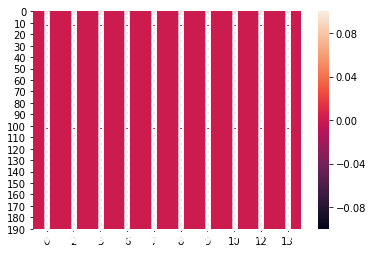

In [13]:
sns.heatmap(df_heart.isnull(),annot=True)

In [14]:
df_heart.isnull().sum()

0     0
2     0
3     0
6     0
7     0
8     0
9     0
10    0
12    0
13    0
dtype: int64

CHECKING DATA SKEWNESS

In [15]:
df_heart.skew()

0    -0.404091
2    -1.648734
3    -0.773003
6     0.391463
7     0.265689
8    -1.102593
9     0.830878
10    0.210521
12   -5.920627
13    0.297393
dtype: float64

CHECKING OUTLIERS

In [16]:
z=np.abs(zscore(df_heart))
print(z.shape)
print(np.where(z>3))

(200, 10)
(array([ 12,  24,  33,  66,  70,  72,  76,  96,  97, 131, 133, 137, 171,
       176, 189, 194, 196], dtype=int64), array([8, 4, 2, 1, 4, 1, 1, 0, 1, 1, 1, 1, 8, 2, 8, 8, 1], dtype=int64))


REMOVING OUTLIERS

In [17]:
df_final=df_heart.loc[(z<3).all(axis=1)]
print(df_final.shape)

(183, 10)


BOXPLOT

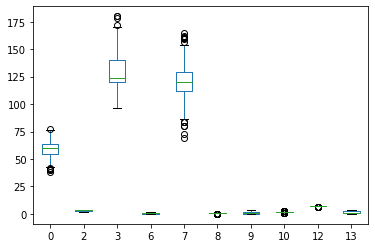

In [18]:
df_final.plot.box()

CORRELATION

In [19]:
df_final.corr()

,0,2,3,6,7,8,9,10,12,13
0,1.000000,0.005890,0.177077,0.056449,-0.108615,0.073009,0.174213,0.114750,0.003973,0.299125
2,0.005890,1.000000,0.104283,0.028243,-0.039450,0.034432,0.241260,0.034879,0.001192,0.200921
3,0.177077,0.104283,1.000000,0.022577,0.112694,0.034485,0.285347,0.073886,-0.052359,0.162051
6,0.056449,0.028243,0.022577,1.000000,-0.024264,-0.066277,-0.146383,-0.078457,-0.082090,-0.030374
7,-0.108615,-0.039450,0.112694,-0.024264,1.000000,-0.014437,0.134378,-0.069488,-0.192343,-0.067136
8,0.073009,0.034432,0.034485,-0.066277,-0.014437,1.000000,0.138276,0.085407,0.254942,0.269797
9,0.174213,0.241260,0.285347,-0.146383,0.134378,0.138276,1.000000,0.337423,0.016474,0.357258
10,0.114750,0.034879,0.073886,-0.078457,-0.069488,0.085407,0.337423,1.000000,-0.024654,0.137278
12,0.003973,0.001192,-0.052359,-0.082090,-0.192343,0.254942,0.016474,-0.024654,1.000000,-0.016915
13,0.299125,0.200921,0.162051,-0.030374,-0.067136,0.269797,0.357258,0.137278,-0.016915,1.000000


PAIRPLOT

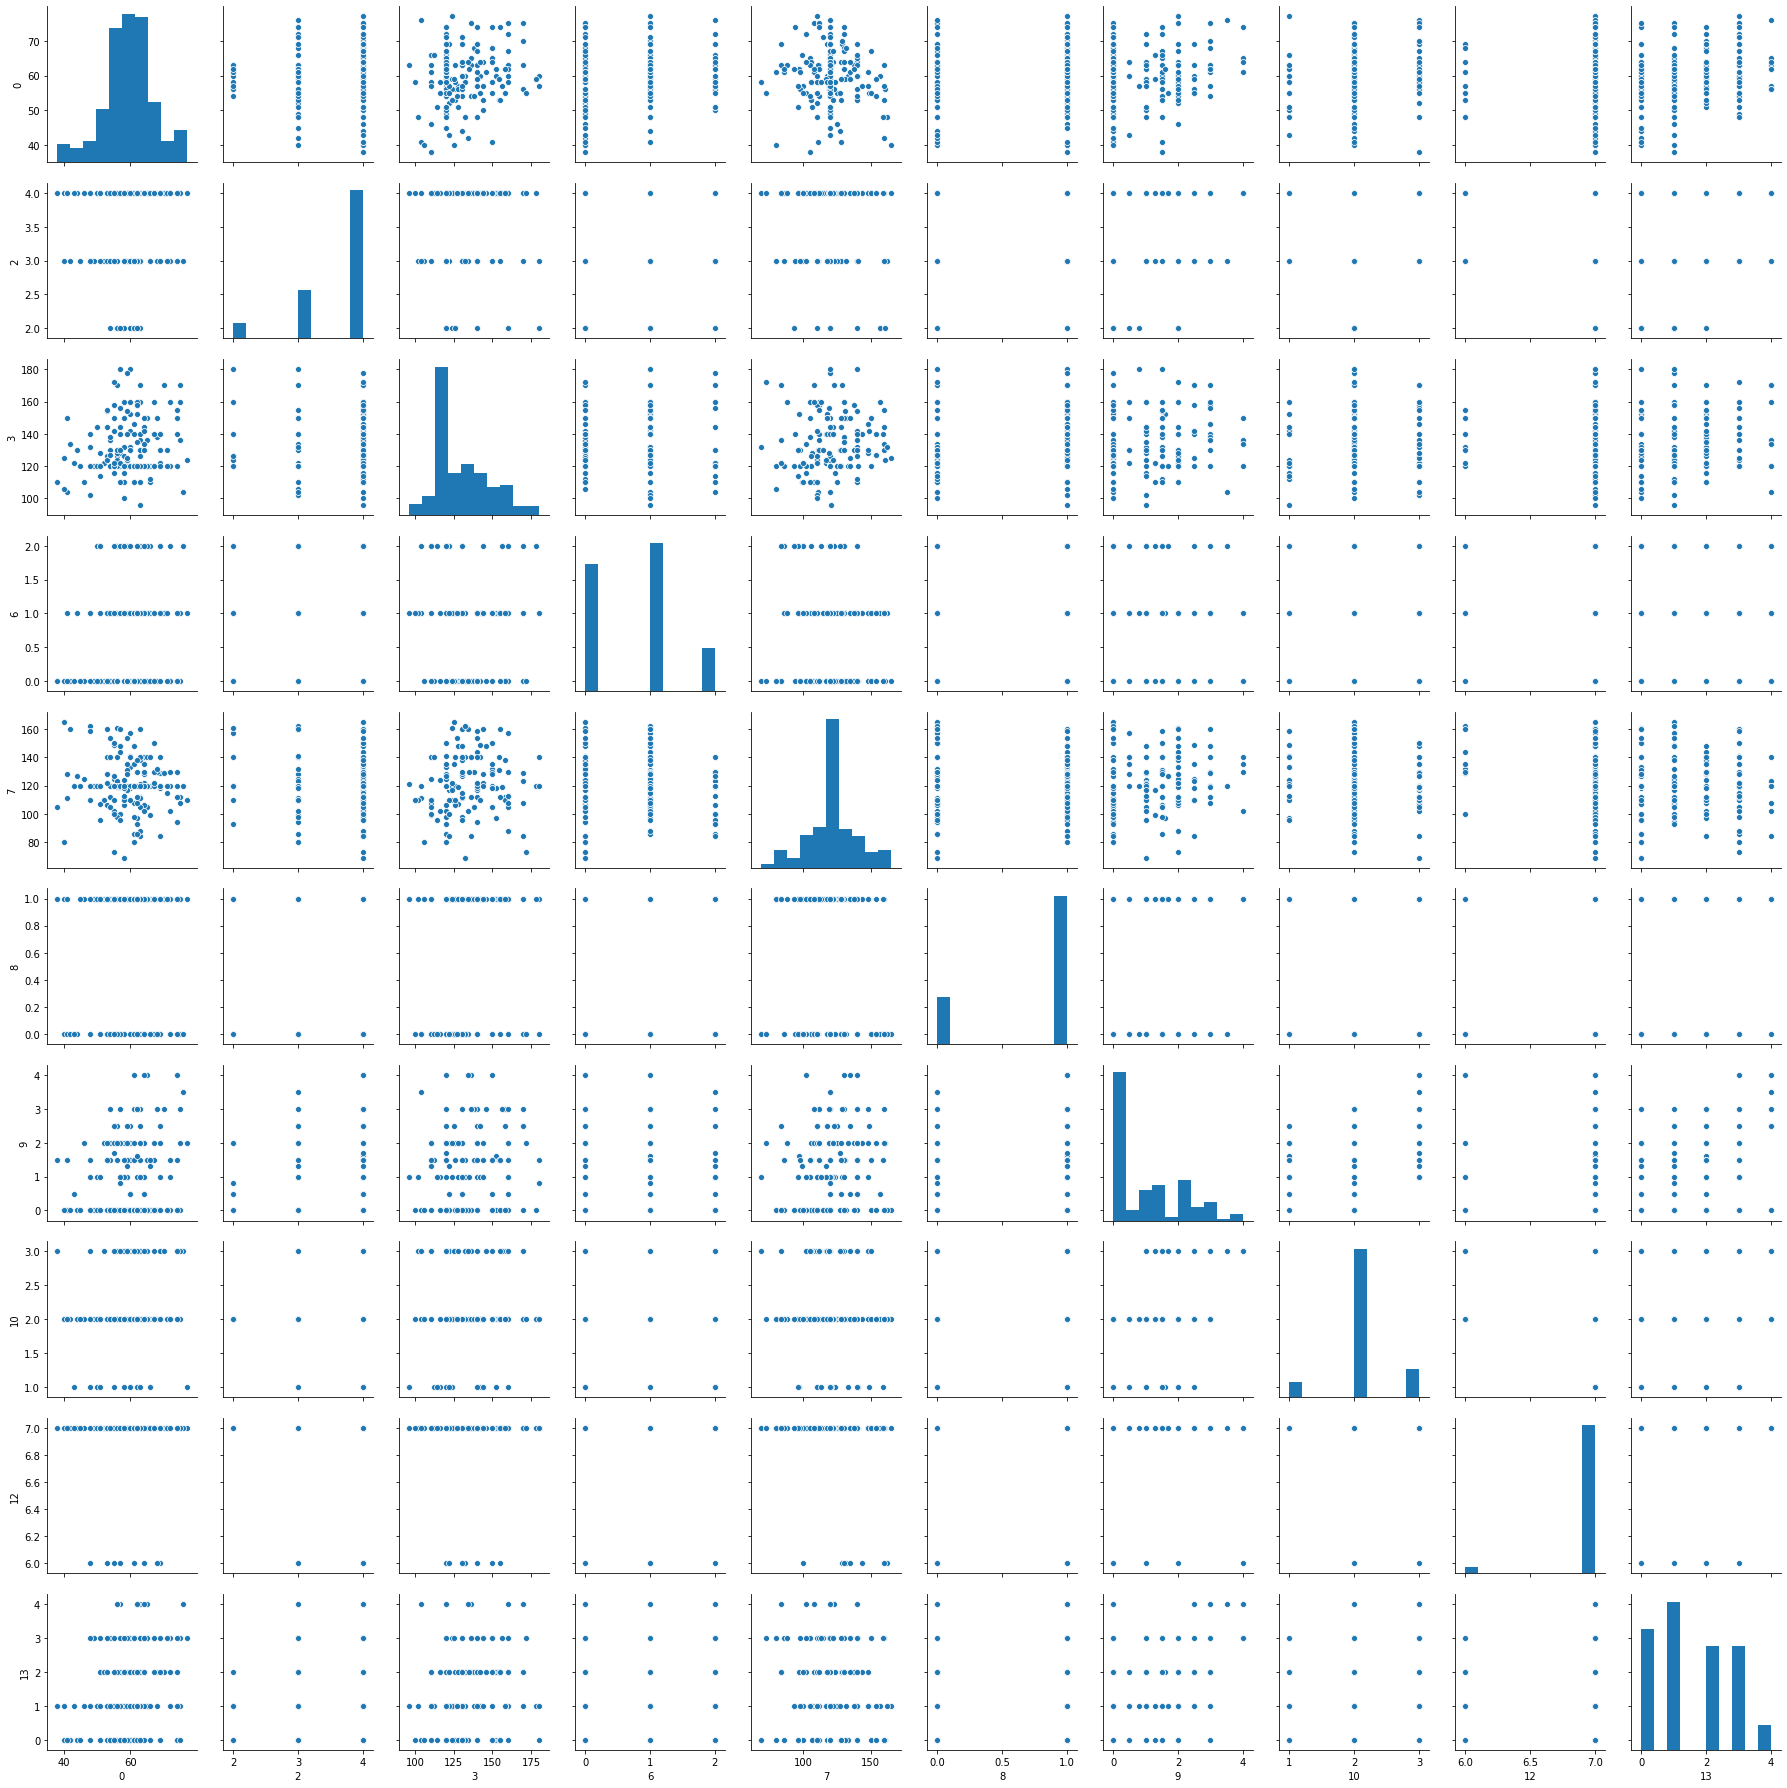

In [20]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [21]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

       0    2      3    6      7    8    9    10   12
0    63.0  4.0  140.0  1.0  112.0  1.0  3.0  2.0  7.0
1    44.0  4.0  130.0  1.0  127.0  0.0  0.0  2.0  7.0
2    60.0  4.0  132.0  1.0  140.0  1.0  1.5  3.0  7.0
3    55.0  4.0  142.0  1.0  149.0  1.0  2.5  1.0  7.0
4    66.0  3.0  110.0  2.0   99.0  1.0  1.3  2.0  7.0
..    ...  ...    ...  ...    ...  ...  ...  ...  ...
193  62.0  4.0  158.0  1.0  138.0  1.0  0.0  2.0  7.0
195  54.0  4.0  127.0  1.0  154.0  0.0  0.0  2.0  7.0
197  55.0  4.0  122.0  1.0  100.0  0.0  0.0  2.0  6.0
198  58.0  4.0  120.0  2.0  120.0  1.0  0.0  2.0  7.0
199  62.0  2.0  120.0  2.0   93.0  1.0  0.0  2.0  7.0

[183 rows x 9 columns]
0      2.0
1      0.0
2      2.0
3      1.0
4      0.0
      ... 
193    1.0
195    1.0
197    2.0
198    0.0
199    1.0
Name: 13, Length: 183, dtype: float64

(183, 9)
(183,)


STANDARD SCALER

In [22]:
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.skew()

0    -0.244491
2    -1.436005
3     0.910697
6     0.388977
7     0.035001
8    -1.224821
9     0.832313
10    0.236202
12   -4.500234
dtype: float64

# TRAINING AND TESTING - VARIOUS MODELS

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=64,stratify=y)

In [24]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(128, 9) (55, 9)
(128,) (55,)


CLASSIFIERS

In [25]:
knn=KNeighborsClassifier(n_neighbors=10)
sv=SVC()
lr=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=64)
rfc=RandomForestClassifier()

In [26]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',sv))
models.append(('DecisionTreeClassifier',dtc))
models.append(('LogisticRegression',lr))
models.append(('RandomForestClassifier',rfc))

FUNCTION DECLARATION

************* KNeighborsClassifier *************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy Score =  0.38181818181818183


cross_val_score =  0.3504166666666667


classification_report
               precision    recall  f1-score   support

         0.0       0.60      0.46      0.52        13
         1.0       0.43      0.56      0.49        16
         2.0       0.29      0.17      0.21        12
         3.0       0.24      0.36      0.29        11
         4.0       0.00      0.00      0.00         3

    accuracy                           0.38        55
   macro avg       0.31      0.31      0.30        55
weighted avg       0.38      0.38      0.37        55



[[6 3 1 3 0]
 [2 9 1 4 0]
 [2 4 2 4 0]
 [0 4 3 4 0]
 [0 1 0 2 0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************* SVC *************


SVC(C=1.0, cache_

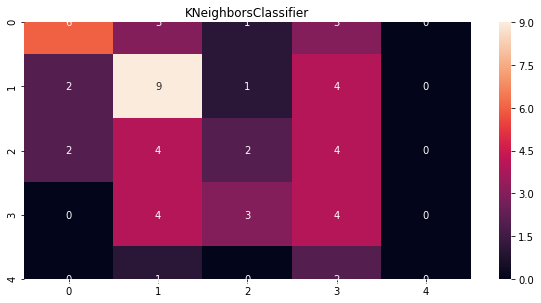

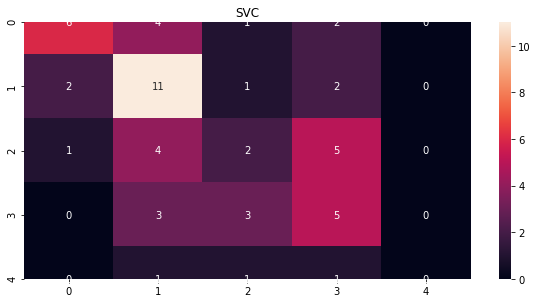

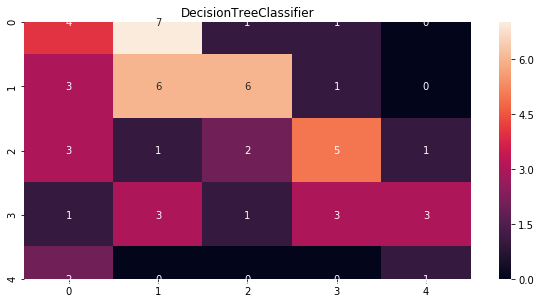

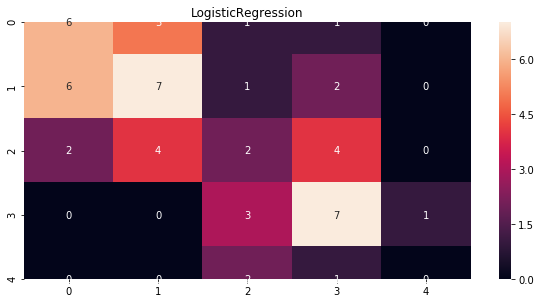

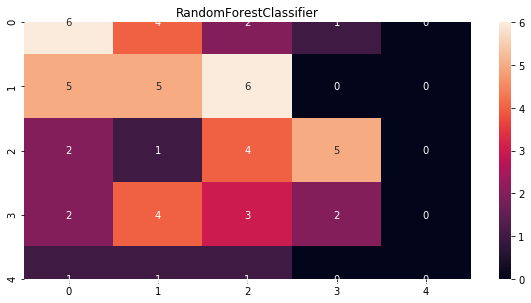

In [27]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('*************',name,'*************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,y_pred)
    print('Accuracy Score = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,y_pred))
    print('\n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

# BEST MODEL

In [28]:
result=pd.DataFrame({'Model ':Model,'Accuracy Score ':score,'Cross_Val_Score':cvs})
result

,Model,Accuracy Score,Cross_Val_Score
0,KNeighborsClassifier,38.181818,35.041667
1,SVC,43.636364,38.944444
2,DecisionTreeClassifier,29.090909,28.111111
3,LogisticRegression,40.000000,36.000000
4,RandomForestClassifier,30.909091,30.638889


I choose SVC for this dataset.

# PICKLE

In [29]:
joblib.dump(sv,'heartdisease.pkl')

['heartdisease.pkl']